### Random forest regressor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

### Importing the scaled dataset

In [2]:
df = pd.read_csv("/Users/asheshlalshrestha/Desktop/UB/Research/CarePathways/Models/Datasets/preprocessed_dataset.csv")

In [3]:
df = df.drop(["Unnamed: 0","id"],axis=1)
df

,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Respiractin,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil
0,21,0.485152,1,0.003233,0.001623,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,-0.308119,0,-1.497964,-0.362476,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,-0.491182,0,0.003233,0.001623,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,1.705571,1,1.989114,-0.766671,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,1.522508,1,0.003233,0.001623,1.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2,-0.613224,0,-0.235617,-0.417097,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
502,13,0.485152,0,0.003233,-1.378426,0.0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
503,19,0.912299,1,-1.110511,-0.832216,0.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,9,0.485152,1,0.003233,0.079954,0.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
y = df.hospital_length_of_stay
X = df.drop('hospital_length_of_stay',axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [7]:
y_pred = rf.predict(X_test)

In [8]:
mse_y_train = mean_squared_error(y_test, y_pred)
print("Mean Squared Error train:", mse_y_train)

Mean Squared Error train: 136.67239411764706


### Hperparameter tuning for train dataset (Grid Search)

In [9]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from the Grid Search
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Mean Squared Error: {best_score}")

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best Mean Squared Error: 131.84333794090554


### Hyperparameter tuning for test dataset (Grid search)

In [10]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_test, y_test)

# Get the best parameters and best score from the Grid Search
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Mean Squared Error: {best_score}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Mean Squared Error: 134.08280939824323


### Hyperparameter tuning for train dataset (Randomized search)

In [11]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Perform Randomized Search Cross-Validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters and best score from the Randomized Search
best_params = random_search.best_params_
best_score = -random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Mean Squared Error: {best_score}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 149}
Best Mean Squared Error: 134.5106172254752


###  Hyperparameter tuning for test dataset (Randomized search)

In [12]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Perform Randomized Search Cross-Validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_test, y_test)

# Get the best parameters and best score from the Randomized Search
best_params = random_search.best_params_
best_score = -random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Mean Squared Error: {best_score}")

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 70}
Best Mean Squared Error: 138.17555003964543


### Trying another approach by finding he important features

In [13]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)
print("MAE:",mae)
print("mse:",mse)
print("rmse:",rmse)
print("r2:",r2)

MAE: 8.295098039215686
mse: 133.79462156862746
rmse: 11.566962503986407
r2: 0.05223905730416345


###  Important features are those which have importance of more than 0

In [23]:
df_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
df_importance = df_importance[df_importance['Importance']>0]
df_importance.reset_index()

,index,Feature,Importance
0,0,age,1.023471e-01
1,2,height,8.815547e-02
2,3,weight,7.851537e-02
3,496,Lansoprazole,6.623113e-02
4,152,Amoxicillin/Clavulanate,4.255517e-02
...,...,...,...
625,654,Colchicine Tab,9.921694e-08
626,691,Nasonex,8.997310e-08
627,555,Zithromax,7.918450e-08
628,416,Apresoline,7.516304e-08


### Extracting a new X for random forest with features having importance more than 0

In [27]:
feature_array = df_importance['Feature'].values
cols_to_drop = [col for col in X.columns if col not in feature_array]
new_x_for_randomforest = X.drop(cols_to_drop,axis=1)
new_x_for_randomforest

,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),Diabetes,...,Hydrodiuril,Lectopam Tab,Ipratropium Bromide,Muscle &Amp; Back Pain Relief Caplets,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Elavil
0,0.485152,1,0.003233,0.001623,0.0,0,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.308119,0,-1.497964,-0.362476,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.491182,0,0.003233,0.001623,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.705571,1,1.989114,-0.766671,0.0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.522508,1,0.003233,0.001623,1.0,0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.613224,0,-0.235617,-0.417097,0.0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,0.485152,0,0.003233,-1.378426,0.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
503,0.912299,1,-1.110511,-0.832216,0.0,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,0.485152,1,0.003233,0.079954,0.0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Creating a new train test model with X as new_x_for_randomforest

In [28]:
X_train, X_test, y_train, y_test = train_test_split(new_x_for_randomforest, y, test_size=0.3, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)
print("MAE:",mae)
print("mse:",mse)
print("rmse:",rmse)
print("r2:",r2)

MAE: 8.524671052631579
mse: 163.2257125
rmse: 12.775981860506846
r2: 0.037055788134069956


### Aother approach to reduce the dimension using PCA 
#### However, we will be achieving 90 percent variance of the data

In [43]:
## implementing PCA on the originial X
pca = PCA(n_components = 140)
# Transform data
pca_trans = pca.fit_transform(X)     
print(pca_trans)                                                  
print(pca_trans.shape)

[[-0.46285071 -0.80303111  0.24250358 ...  0.18423679  0.17557757
  -0.02289721]
 [-0.9975716   1.1140011   0.5891324  ... -0.03199832  0.05282907
   0.10126337]
 [ 0.22524502  0.47810389 -0.08194291 ...  0.01195268 -0.01609331
   0.01166797]
 ...
 [-1.63111708  0.02813336  0.09989589 ...  0.12702451 -0.04470237
  -0.00336545]
 [-0.18036953 -0.36818808  0.12110349 ... -0.08333206 -0.02289132
   0.15220791]
 [-1.01704231  0.09059566  0.28348111 ... -0.0898684  -0.23697597
  -0.14758225]]
(506, 140)


Total variance captured: 0.90384878944707


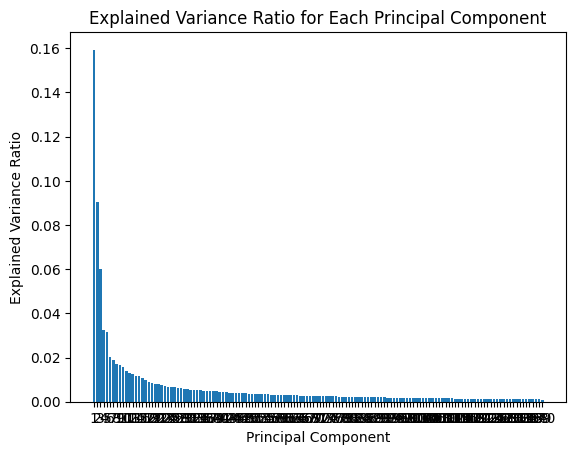

In [44]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Print the explained variance ratios for each component
# print("Explained Variance Ratios for each component:")
# for i, var_ratio in enumerate(explained_variance_ratios):
#     print(f"Component {i+1}: {var_ratio}")
print("Total variance captured:",sum(explained_variance_ratios))
# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

### Using random forest on the PCA transformed data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)
print("MAE:",mae)
print("mse:",mse)
print("rmse:",rmse)
print("r2:",r2)

MAE: 9.185723684210526
mse: 168.58564407894735
rmse: 12.984053453330642
r2: 0.005435064836906811


### Applying PCA on the new_x_for_randomforest

In [46]:
## implementing PCA on the originial X
pca = PCA(n_components = 140)
# Transform data
pca_trans = pca.fit_transform(new_x_for_randomforest)     
print(pca_trans)                                                  
print(pca_trans.shape)

[[-0.46179535 -0.79485942  0.24370203 ... -0.00421305 -0.00289942
  -0.33320558]
 [-0.99784264  1.11396873  0.58937082 ... -0.08677387 -0.02135919
   0.03767533]
 [ 0.22518599  0.47791777 -0.08180104 ... -0.00540945  0.02057345
   0.02428437]
 ...
 [-1.63139759  0.02785239  0.10007114 ...  0.06480883  0.02497404
  -0.05704031]
 [-0.18045315 -0.36835694  0.12133277 ... -0.01783266 -0.12098932
   0.26962558]
 [-1.01723945  0.09030912  0.28368601 ...  0.06743502  0.04305392
   0.02792849]]
(506, 140)


Total variance captured: 0.9137476075169878


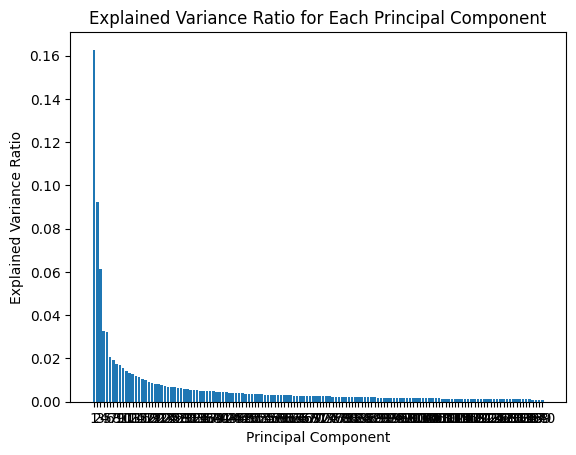

In [47]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Print the explained variance ratios for each component
# print("Explained Variance Ratios for each component:")
# for i, var_ratio in enumerate(explained_variance_ratios):
#     print(f"Component {i+1}: {var_ratio}")
print("Total variance captured:",sum(explained_variance_ratios))
# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)
print("MAE:",mae)
print("mse:",mse)
print("rmse:",rmse)
print("r2:",r2)

MAE: 9.046052631578947
mse: 162.0256065789474
rmse: 12.728927943033828
r2: 0.04413576979016853
